#ImageNetでテスト
- ほぼclassificationのサンプルそのまま！
- 上位の結果を文字列でプリントするあたりに違いあり

## 定形的なところ

In [60]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import os

os.chdir(os.path.expanduser("~/caffe/myProj"))

import sys
import caffe

In [61]:
# take an array of shape (n, height, width) or (n, height, width, channels)
#  and visualize each (height, width) thing in a grid of size approx. sqrt(n) by sqrt(n)
def vis_square(data, padsize=1, padval=0):
    data -= data.min()
    data /= data.max()
    
    # force the number of filters to be square
    n = int(np.ceil(np.sqrt(data.shape[0])))
    padding = ((0, n ** 2 - data.shape[0]), (0, padsize), (0, padsize)) + ((0, 0),) * (data.ndim - 3)
    data = np.pad(data, padding, mode='constant', constant_values=(padval, padval))
    
    # tile the filters into an image
    data = data.reshape((n, n) + data.shape[1:]).transpose((0, 2, 1, 3) + tuple(range(4, data.ndim + 1)))
    data = data.reshape((n * data.shape[1], n * data.shape[3]) + data.shape[4:])
    
    plt.imshow(data)

In [62]:
MODEL_FILE  = 'caffe/models/bvlc_reference_caffenet/deploy.prototxt'
PRETRAINED  = 'caffe/models/bvlc_reference_caffenet/bvlc_reference_caffenet.caffemodel'
#MEAN_FILE  = 
LABEL_WORDS = 'caffe/data/ilsvrc12/synset_words.txt'

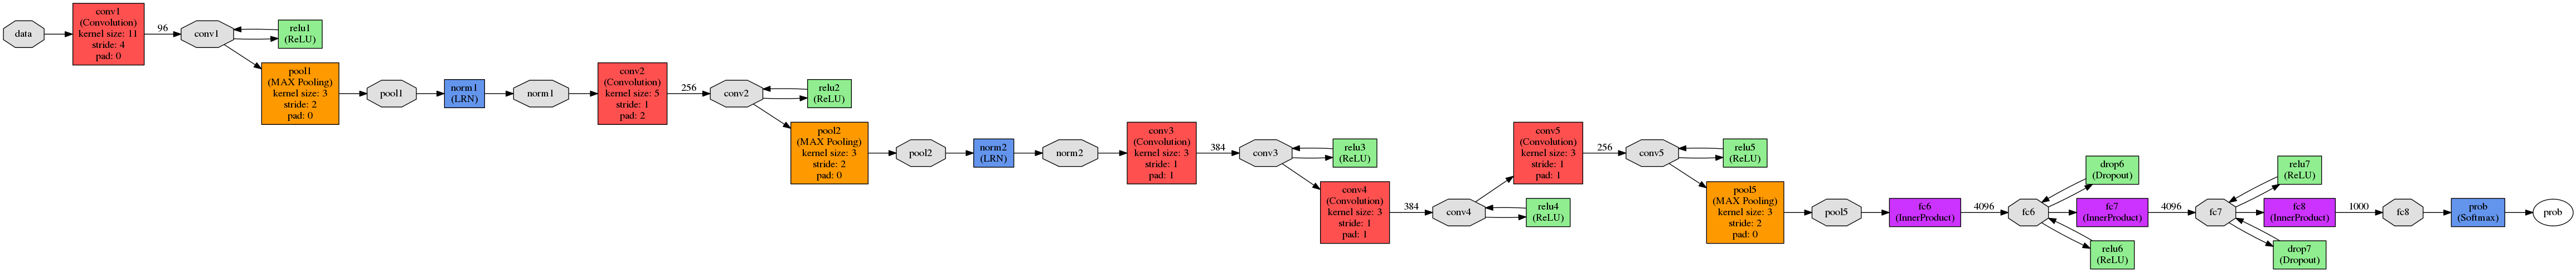

In [63]:
from google.protobuf import text_format
from caffe.draw import get_pydot_graph
from IPython.display import display, Image
from caffe.proto import caffe_pb2

net_param = caffe_pb2.NetParameter()
f = open(MODEL_FILE)
text_format.Merge(f.read(), net_param)
display(Image(get_pydot_graph(net_param,"LR").create_png()))


## 入力

In [64]:
#IMAGE_FILE = 'http://blogs.c.yimg.jp/res/blog-80-a3/coizoradaisuki/folder/942921/85/31576085/img_0?1351977921'
#IMAGE_FILE = "http://blogs.c.yimg.jp/res/blog-80-a3/coizoradaisuki/folder/942921/85/31576085/img_8?1351977921"
#IMAGE_FILE = "http://www.wallpaper-box.com/cat/1366768/images/cat49.jpg"
IMAGE_FILE = "http://farm8.staticflickr.com/7174/6636735913_3649811c6d_b.jpg"
#IMAGE_FILE = "http://pic.prepics-cdn.com/nekocute/14793340.jpeg"

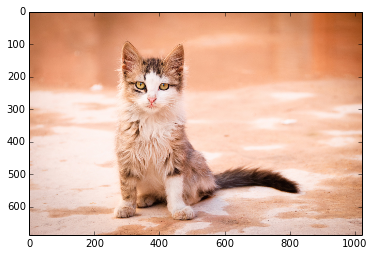

In [65]:
input_image = caffe.io.load_image(IMAGE_FILE)
plt.imshow(input_image)

##識別

In [66]:
#caffe.set_mode_cpu()
#blob = caffe.proto.caffe_pb2.BlobProto()
#data = open( MEAN_FILE, 'rb' ).read()
#blob.ParseFromString(data)
#meanArr = np.array( caffe.io.blobproto_to_array(blob) )[0]
#net = caffe.Classifier(MODEL_FILE, PRETRAINED,
#                       mean=meanArr.mean(1).mean(1),
#                       channel_swap=(2,1,0),
#                       raw_scale=255,
#                       image_dims=(256, 256))
caffe.set_mode_cpu()
net = caffe.Classifier(MODEL_FILE, PRETRAINED,
                       mean=np.load('caffe/python/caffe/imagenet/ilsvrc_2012_mean.npy').mean(1).mean(1),
                       channel_swap=(2,1,0),
                       raw_scale=255,
                       image_dims=(256, 256))

In [71]:
scoreList  = net.predict([input_image])
labelList  = np.loadtxt(LABEL_WORDS, str, delimiter="\t")

labeledList = zip(scoreList[0].tolist(), labelList)
labeledList.sort(cmp=lambda x, y: cmp(x[0], y[0]), reverse=True)

for rank, (score, name) in enumerate(labeledList[:10], start=1):
    print('#%d | %s | %4.1f%%' % (rank, name, score * 100))

#scores = numpy.load(sys.argv[2])
#top_k = 3
#prediction = zip(scores[0].tolist(), categories)
#prediction.sort(cmp=lambda x, y: cmp(x[0], y[0]), reverse=True)
#for rank, (score, name) in enumerate(prediction[:top_k], start=1):
#    print('#%d | %s | %4.1f%%' % (rank, name, score * 100))

#1 | n02123394 Persian cat | 27.0%
#2 | n02127052 lynx, catamount | 23.5%
#3 | n02123045 tabby, tabby cat | 19.9%
#4 | n02124075 Egyptian cat | 12.0%
#5 | n02123159 tiger cat |  5.0%
#6 | n02120079 Arctic fox, white fox, Alopex lagopus |  2.1%
#7 | n02112018 Pomeranian |  1.9%
#8 | n02119789 kit fox, Vulpes macrotis |  1.3%
#9 | n02119022 red fox, Vulpes vulpes |  0.8%
#10 | n02125311 cougar, puma, catamount, mountain lion, painter, panther, Felis concolor |  0.8%


## 可視化

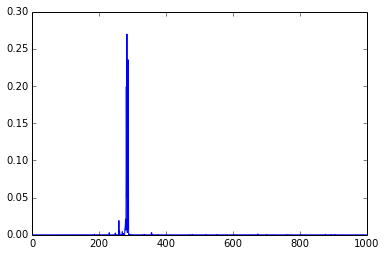

In [68]:
plt.plot(prediction[0])

(96, 3, 11, 11)


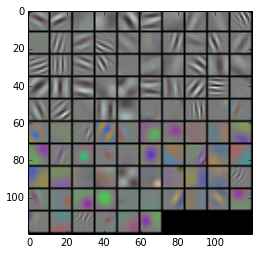

In [86]:
print net.params['conv1'][0].data.shape
vis_square(net.params['conv1'][0].data.transpose(0,2,3,1))

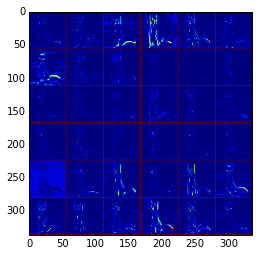

In [73]:
vis_square(net.blobs['conv1'].data[4,:36],padval=1)

(10, 256, 27, 27)


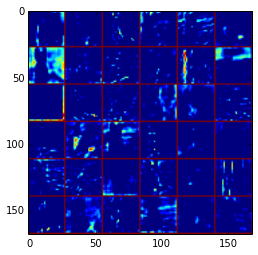

In [81]:
vis_square(net.blobs['conv2'].data[4,:36],padval=1)

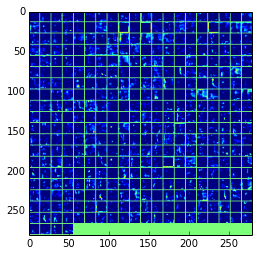

In [77]:
vis_square(net.blobs['conv3'].data[4],padval=0.5)

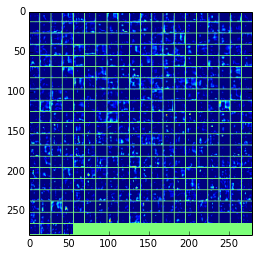

In [76]:
vis_square(net.blobs['conv4'].data[4],padval=0.5)

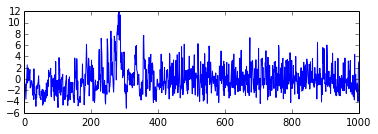

In [74]:
plt.subplot(2,1,1)
plt.plot(net.blobs['fc8'].data[4].flat)

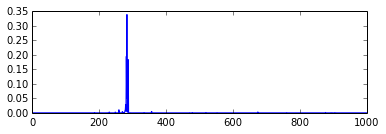

In [18]:
plt.subplot(2,1,1)
plt.plot(net.blobs['prob'].data[4].flat)